In [24]:
#upload file with data
#from google.colab import files
#uploaded = files.upload()

import numpy as np
import pandas as pd
from BeamDeflectorCalculator import BeamDeflectorCalculator


In [25]:
import time
begin=time.time()
data,Y= BeamDeflectorCalculator()
end=time.time()
print(end-begin)

0.6552488803863525


In [26]:
shape=data.shape
N=shape[1]


X = np.zeros((N,12,1))


for ii in range(0,N):
    a = data[2][ii]
    l = data[0][ii]
    
  
    X[ii,int(np.round(a*10)),0] = 1
    X[ii,-1,0]=l



In [27]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# ['linear','sigmoid','relu']:
model1 = Sequential()
#model.add(Dense(units=64, activation='sigmoid', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(12,)))
model1.add(Dense(units=64, activation='relu', use_bias=True, input_shape=(12,)))
model1.add(Dense(units=32, activation='relu', use_bias=True))
model1.add(Dense(units=24, activation='relu', use_bias=True))
model1.add(Dense(units=11, activation='linear', use_bias=False))
model1.compile(loss='mean_squared_error', optimizer='adam')
history1 = model1.fit( X[:,:,0], Y, validation_data=(X[:,:,0], Y), epochs=30, batch_size=32, verbose=1)  

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 1s 90us/step - loss: 6.5939 - val_loss: 0.5899
Epoch 2/30
10000/10000 [==============================] - 0s 47us/step - loss: 0.2799 - val_loss: 0.1375
Epoch 3/30
10000/10000 [==============================] - 1s 53us/step - loss: 0.1028 - val_loss: 0.0775
Epoch 4/30
10000/10000 [==============================] - 1s 54us/step - loss: 0.0531 - val_loss: 0.0393
Epoch 5/30
10000/10000 [==============================] - 1s 52us/step - loss: 0.0342 - val_loss: 0.0271
Epoch 6/30
10000/10000 [==============================] - 1s 52us/step - loss: 0.0231 - val_loss: 0.0166
Epoch 7/30
10000/10000 [==============================] - 0s 43us/step - loss: 0.0164 - val_loss: 0.0120
Epoch 8/30
10000/10000 [==============================] - 0s 49us/step - loss: 0.0115 - val_loss: 0.0087
Epoch 9/30
10000/10000 [==============================] - 1s 67us/step - loss: 0.0113 - val_loss: 0.0074
Epoch

In [28]:
y_pred1 = model1.predict(X[:,:,0])

In [29]:



X2 = np.zeros((N,11,1))
Ls2 = np.zeros((N,1,1))

for ii in range(0,N):
    a = data[2][ii]
    l = data[0][ii]
    
  
    X2[ii,int(np.round(a*10)),0] = 1
    Ls2[ii,0,0]=l




Tensor("dense_43/Relu:0", shape=(?, 11), dtype=float32)
Tensor("dense_44/BiasAdd:0", shape=(?, 1), dtype=float32)
Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 3s 269us/step - loss: 6.4270 - val_loss: 0.2676
Epoch 2/30
10000/10000 [==============================] - 2s 159us/step - loss: 0.1993 - val_loss: 0.1535
Epoch 3/30
10000/10000 [==============================] - 2s 157us/step - loss: 0.1306 - val_loss: 0.1195
Epoch 4/30
10000/10000 [==============================] - 1s 142us/step - loss: 0.1012 - val_loss: 0.1135
Epoch 5/30
10000/10000 [==============================] - 1s 141us/step - loss: 0.0317 - val_loss: 0.0154
Epoch 6/30
10000/10000 [==============================] - 1s 133us/step - loss: 0.0193 - val_loss: 0.0137
Epoch 7/30
10000/10000 [==============================] - 1s 134us/step - loss: 0.0151 - val_loss: 0.0117
Epoch 8/30
10000/10000 [==============================] - 1s 130us/step - loss: 0.0102 - val_l

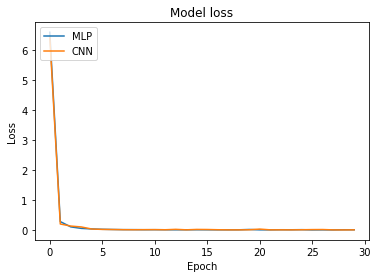

In [35]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(11,1))
inputB = krs.Input(shape=(1,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(11, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(11, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(1, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(11, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer='adam')
history2 = model.fit( [X2,Ls2[:,0,0]], Y, validation_data=([X2,Ls2[:,0,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'], label='MLP')
plt.plot(history2.history['loss'], label='CNN')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [31]:
y_pred = model.predict([X2,Ls2[:,0,0]])

[0.         0.00819541 0.01540738 0.02065244 0.02318131 0.02318131
 0.02107392 0.01728061 0.01222287 0.00632218 0.        ]
[0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.12]


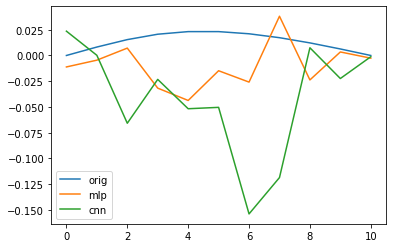

[0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7.8]


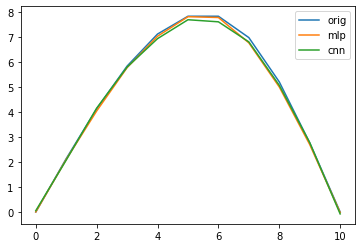

[0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   6.58]


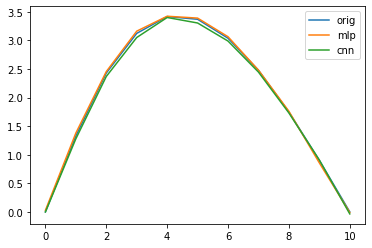

[0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.22]


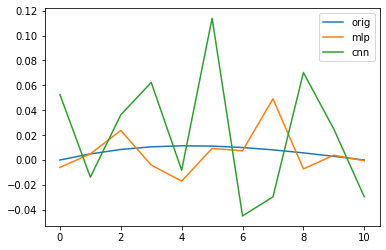

[0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   5.07]


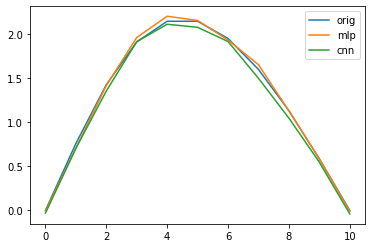

[0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.5]


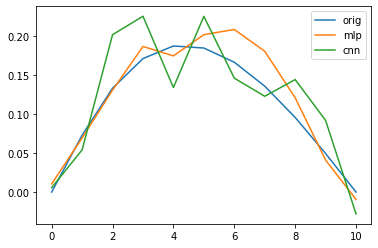

[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.5]


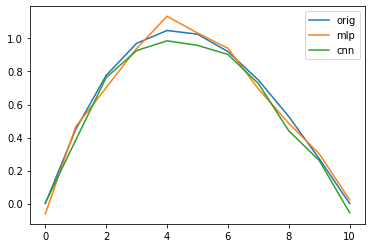

[0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   9.56]


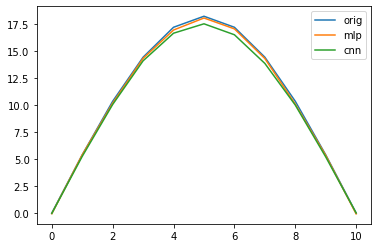

[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.58]


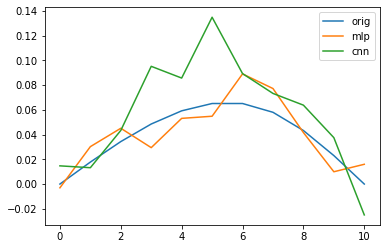

[0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.69]


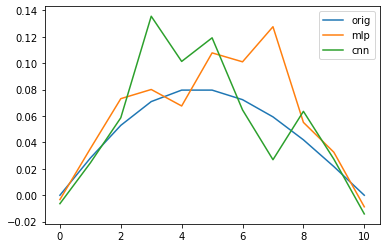

[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   9.14]


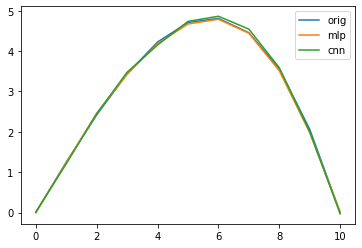

[0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   2.89]


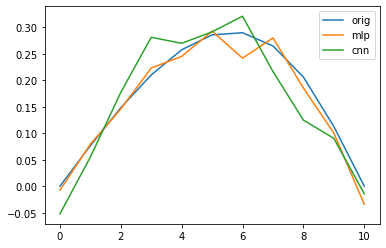

[0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   7.49]


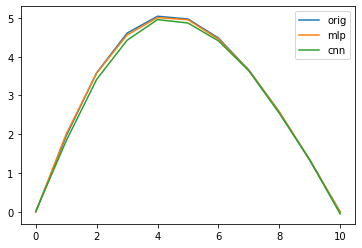

[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   5.33]


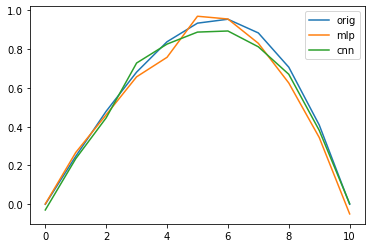

[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   2.32]


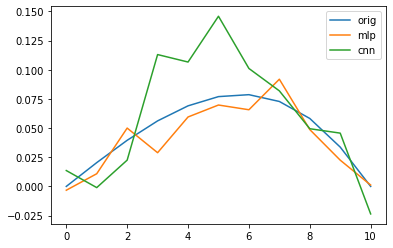

[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   5.53]


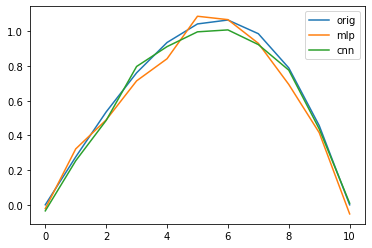

[0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  3.4]


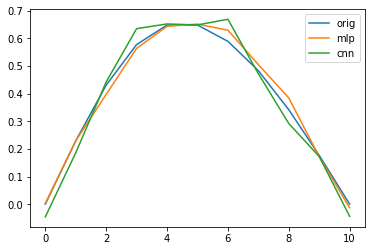

[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.9]


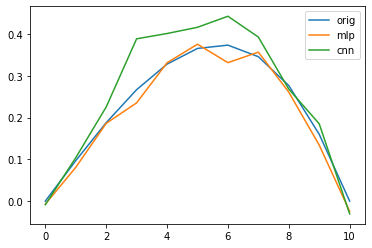

[0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   7.58]


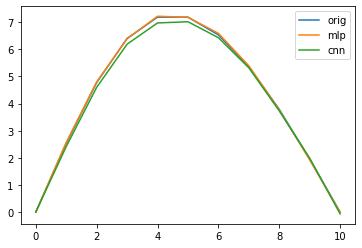

[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   4.86]


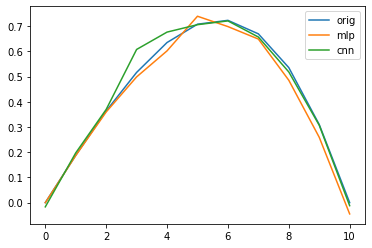

In [36]:
import time
print(Y[0,:])

fig = plt.figure()
for ii in range(20):
    print(X[ii,:,0])
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='mlp')

    plt.plot(y_pred[ii,:],label='cnn')
    plt.legend()
    plt.show()
    time.sleep(2) 
    plt.close()